# Datahut QA Assignment

#####  Load the Dataset
Use libraries like pandas in Python to load your dataset

In [1]:
# Importing necessary libraries
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Load the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/aryalekshmiI/Data-Science-and-Machine-Learning/main/messy_data.csv')  # Replace 'your_file.csv' with your file path

# Get an overview of the dataset 
df.head()  # This shows the first few rows of the DataFrame

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


Unnamed: 0: Index column (likely unnecessary).

ID: Unique identifier.

Name: Contains many missing values (8,667 non-null).

Age: Some missing and possibly erroneous values (e.g., age 90 might be an error).

Email: Some missing and possibly improperly formatted values.

Join Date: Some missing values, and the format needs verification.

Salary: Some missing values.

Department: Many missing values, possibly some misformatted.

In [3]:
# Drop column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

#####  Explore the Dataset

In [4]:
# Checking the shape of the dataset

print("Shape of the dataset:", df.shape)

Shape of the dataset: (11000, 7)


In [5]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          11000 non-null  object 
 1   Name        8667 non-null   object 
 2   Age         9253 non-null   float64
 3   Email       9731 non-null   object 
 4   Join Date   8808 non-null   object 
 5   Salary      8761 non-null   float64
 6   Department  8745 non-null   object 
dtypes: float64(2), object(5)
memory usage: 601.7+ KB


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64


###### Handle Missing Values

Name: Since this is likely an important identifier, rows with missing names can be dropped.

Age: We can fill the missing values with the median age since it’s numerical and may have outliers.

Email: Since it’s a contact information field, missing emails can be left as they are, or rows with missing emails can be dropped based on their importance.

Join Date: If the date of joining is critical, rows with missing values can be removed. Alternatively, these could be filled with a default value like the most common date or left as missing.

Salary: Filling with the median salary is a reasonable approach.

Department: If the department is critical for analysis, rows with missing values can be dropped. Alternatively, it can be filled with the most common department.

In [7]:
#Drop rows with missing 'Name' and 'Email'
df_cleaned = df.dropna(subset=['Name', 'Email'])

#Fill missing 'Age' and 'Salary' with median values
median_age = df_cleaned['Age'].median()
median_salary = df_cleaned['Salary'].median()

df_cleaned['Age'].fillna(median_age, inplace=True)
df_cleaned['Salary'].fillna(median_salary, inplace=True)

#Fill missing 'Department' with the most frequent value (mode)
most_common_department = df_cleaned['Department'].mode()[0]
df_cleaned['Department'].fillna(most_common_department, inplace=True)

#Check for any remaining missing values
print(df_cleaned.isnull().sum())

#Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


ID              0
Name            0
Age             0
Email           0
Join Date     827
Salary          0
Department      0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14096\884660148.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(median_age, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14096\884660148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'].fillna(median_age, inplace=True)
C:\Users\user\AppData

###### 5. Remove Duplicates:

In [8]:
# Check for duplicates
print("\nDuplicated Rows:")
print(df.duplicated().sum())


Duplicated Rows:
291


In [9]:
# Finding the number of unique values present in each column
df.nunique()

ID            10000
Name           7929
Age              73
Email          9160
Join Date      3338
Salary         8122
Department      264
dtype: int64

In [10]:
#To remove duplicates on specific column ID because ID is unique identity
df.drop_duplicates(subset=['ID'])

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing
...,...,...,...,...,...,...,...
9995,610210a0-e344-4b79-95ce-ff6583d7d8ce,David Lambalone,70.0,jeremybanks@rogers.biz,2020-12-17,88472.0,Support
9996,eb66531c-901a-4da7-bc60-a4951886b5a8,Karen Yoder,59.0,smithdaniel@williams-thompson.net,2023-12-12,71575.0,NaN
9997,86a83f25-224d-498d-9901-c2e4a49ffbd2,Anthony Rasmussen,57.0,nfranklin@yahoo.com,05/12/1979,128456.0,Marketing
9998,9cbba425-6af2-455f-8566-62402de79661,Nicole Moore,82.0,lmyers@gmail.com,2020-10-28,128939.0,EngineeringV


###### Check which columns contain missing data.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


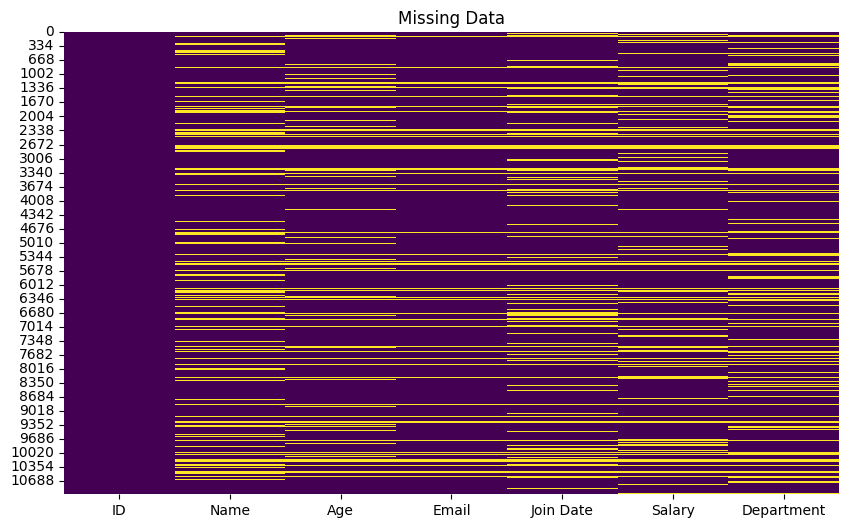

In [11]:
# Visualize missing values with a heatmap 
#install seaborn)
!python -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

In [12]:
# Check for non-numeric values in numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Non-numeric values in numeric columns:")
for col in numeric_columns:
    print(f"\n{col}:")
    print(df[~df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()])

# Check for inconsistent date formats in date columns
# Ensure dates are properly formatted
if 'date_column_name' in df.columns:
    df['date_column_name'] = pd.to_datetime(df['date_column_name'], errors='coerce')
    print(df['date_column_name'].head())


Non-numeric values in numeric columns:

Age:
                                         ID                Name  Age  \
16     241e20d7-cc36-495e-86c2-2928bbaa93d8        Mark Wilkins  NaN   
18     05e36d3f-6422-4329-80b2-1fd3543ee254                 NaN  NaN   
19     a8b6e8e3-f2f2-42c6-b2d7-2bbfd9b91125                 NaN  NaN   
20     2205ccce-1a22-44cb-9107-01990df7f935           Eric Cole  NaN   
24     3f741e1f-f781-463e-a12a-871d3866c711                 NaN  NaN   
...                                     ...                 ...  ...   
10975  2adebc64-900d-431a-93cd-118de4bb6eb7                 NaN  NaN   
10978  1ea7f125-698d-49dc-a97a-955b4dc4fc9b                 NaN  NaN   
10988  4edd1e6e-cfb5-4300-9c74-e9642836e134                 NaN  NaN   
10995  07c223be-03e6-4f70-a2b5-86df778cc61a                 NaN  NaN   
10997  ed19c966-d6d8-4047-b410-b6e595a39340  Stephanie Riossell  NaN   

                           Email   Join Date         Salary Department  
16       longjenn

In [13]:
# List duplicated rows
duplicates = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
                                         ID            Name   Age  \
10002  07727d57-4574-4a0f-9372-51e7e7d526e7             NaN   NaN   
10005  418d64f6-5c24-4023-a19b-085664d8aa82             NaN   NaN   
10008  07a02c66-def7-4a7b-8b5a-792c3742d3f0      Lisa Reyes  37.0   
10009  e3628acd-d04a-4b74-9775-1aecb6b938ba             NaN   NaN   
10011  6dd96a78-a797-404b-b47a-b5723ba8e605             NaN   NaN   
...                                     ...             ...   ...   
10975  2adebc64-900d-431a-93cd-118de4bb6eb7             NaN   NaN   
10978  1ea7f125-698d-49dc-a97a-955b4dc4fc9b             NaN   NaN   
10988  4edd1e6e-cfb5-4300-9c74-e9642836e134             NaN   NaN   
10995  07c223be-03e6-4f70-a2b5-86df778cc61a             NaN   NaN   
10999  fc25a38a-5747-46eb-b6d3-7173f8255809  Caroline Ochoa  53.0   

                   Email   Join Date    Salary Department  
10002                NaN         NaN       NaN        NaN  
10005                NaN         N


Statistical Summary of Numeric Columns:
               Age         Salary
count  9253.000000    8761.000000
mean     54.162650   89886.585012
std      21.072919   34896.320117
min      18.000000   24655.136613
25%      36.000000   59723.844874
50%      54.000000   89241.000000
75%      72.000000  119491.000000
max      90.000000  176156.206747


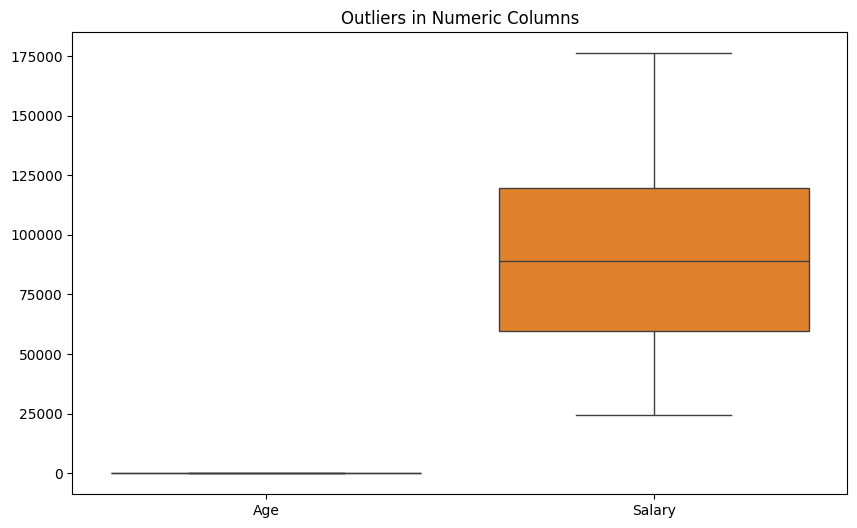

In [14]:
# Descriptive statistics to check for outliers
print("\nStatistical Summary of Numeric Columns:")
print(df.describe())

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Outliers in Numeric Columns')
plt.show()

In [15]:
# Find unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in ID:
['1e407ff9-6255-489d-a0de-34135d4f74bd'
 '379f55b8-87d5-4739-a146-7400b78c24d1'
 '18261368-dfa1-47f0-afc6-bddf45926b07' ...
 '86a83f25-224d-498d-9901-c2e4a49ffbd2'
 '9cbba425-6af2-455f-8566-62402de79661'
 'ae6eee4d-ca8f-4932-96f1-487230875968']

Unique values in Name:
['Hunter Thomas' 'Jeremy Irwin' 'Jennifer Hammondquickly' ...
 'Shelley Hopkinslive' 'Steven Armstrong' 'Stephanie Riossell']

Unique values in Email:
['xlopez@hotmail.com' 'Jillian Jenkins' 'jscottgreen.biz' ...
 'weavermary@yahoo.com' 'kingcharles@hotmail.com' 'molly89gmail.com']

Unique values in Join Date:
[nan '2022-07-07' '2023-11-21' ... '01/05/1982' '25/12/1992' '15/08/2006']

Unique values in Department:
['Sales' nan 'Engineering' 'SupportJ' 'Marketing' 'SupportE' 'HR'
 'Support' 'HRC' 'SalesA' 'SalesX' 'Supportu' 'Engineeringi' 'MarketingR'
 'Salesw' 'SalesK' 'MarketingU' 'Salesi' 'HRa' 'SalesG' 'Supporty'
 'SalesN' 'Marketinge' 'Marketingv' 'HRv' 'SalesM' 'EngineeringL'
 'MarketingQ' 'HRs'

Age: Some values seem extreme (e.g., 90), and it would be important to check for outliers.

Email: Some emails lack proper format (e.g., luke56gonzalez.com and jscottgreen.biz).

Join Date: Missing values are present.

Salary: Some values seem correct, but we should check for outliers.

Department: There are missing values and potential data entry errors (e.g., SupportJ instead of Support).

In [16]:
# Null check
null_values = df.isnull().sum()
null_values

ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

In [17]:
#check for NaN values in each column
nan_values = df.isna().any()

In [18]:

#print columns with NaN values

columns_with_nan = nan_values[nan_values].index.tolist()
print('columns with NaN values',columns_with_nan)
     

columns with NaN values ['Name', 'Age', 'Email', 'Join Date', 'Salary', 'Department']


In [19]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df.isna().any()

ID            False
Name           True
Age            True
Email          True
Join Date      True
Salary        False
Department     True
dtype: bool

###### Correct Email Formats

In [20]:
import re

In [21]:
#Define a function to validate email format
def is_valid_email(email):
    email_regex = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    return re.match(email_regex, email) is not None

#Apply the function to identify valid email addresses
df['valid_email'] = df['Email'].apply(lambda x: is_valid_email(str(x)))

#Filter out rows with invalid email addresses
df_valid_emails = df[df['valid_email']]

#Remove free/public email domains (e.g., gmail.com, yahoo.com)
free_email_domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com']
df_professional_emails = df_valid_emails[df_valid_emails['Email'].apply(lambda x: not any(domain in x for domain in free_email_domains))]

#Drop the helper column 'valid_email'
df_professional_emails.drop(columns=['valid_email'], inplace=True)

# Optional: Save the filtered dataset with only professional emails
df_professional_emails.to_csv('cleaned_dataset.csv', index=False)

# Display the result
df_professional_emails.head()


C:\Users\user\AppData\Local\Temp\ipykernel_14096\2015618924.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_professional_emails.drop(columns=['valid_email'], inplace=True)


,ID,Name,Age,Email,Join Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR
10,d5fe9321-49cf-4f14-ac96-7aea1204247b,Craig Conway,88.0,gerald47@woodard-smith.com,NaN,81214.525972,Engineering
14,9b83a5e5-9516-493f-86f8-d6c445edb501,Nicole Cardenas,60.0,griffinlinda@harrison.com,16/10/2003,51625.814403,Marketing
15,0074dbd5-10d0-463f-9b10-d8473bea04ba,NaN,22.0,ericjohnson@castillo-mendez.net,2023-03-01,89886.585012,HR


###### Clean Name Fields

In [22]:
#Define a function to clean names
def clean_name(name):
    # Remove any extraneous words, digits, or special characters using regex
    name = re.sub(r'[^a-zA-Z\s]', '', str(name))
    
    # Ensure consistent capitalization (First letter of each part capitalized)
    name = name.title().strip()
    
    return name

#Apply the function to the 'Name' column
df['Cleaned_Name'] = df['Name'].apply(clean_name)

#Drop the original 'Name' column and keep the cleaned version if required
df.drop(columns=['Name'], inplace=True)
df.rename(columns={'Cleaned_Name': 'Name'}, inplace=True)

# Optional: Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

# Display the cleaned names
df[['Name']].head()


,Name
0,Hunter Thomas
1,Jeremy Irwin
2,Jennifer Hammondquickly
3,Sydney Taylorso
4,Julia Lee


###### Standardise Date Formats

In [23]:
#Convert 'Join Date' to datetime format
# Coerce any invalid formats to NaT (not a time)
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')

#Reformat dates to 'YYYY-MM-DD'
df['Join Date'] = df['Join Date'].dt.strftime('%Y-%m-%d')

#Handle any NaT values (optional: replace with 'Unknown' or other placeholder)
df['Join Date'].fillna('Unknown', inplace=True)

# Optional: Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

# Display the first few rows to confirm changes
df[['Join Date']].head()


C:\Users\user\AppData\Local\Temp\ipykernel_14096\3621416705.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Join Date'].fillna('Unknown', inplace=True)


,Join Date
0,Unknown
1,2022-07-07
2,2023-11-21
3,2021-11-05
4,Unknown


In [24]:
print(df['Department'].unique())

['Sales' nan 'Engineering' 'SupportJ' 'Marketing' 'SupportE' 'HR'
 'Support' 'HRC' 'SalesA' 'SalesX' 'Supportu' 'Engineeringi' 'MarketingR'
 'Salesw' 'SalesK' 'MarketingU' 'Salesi' 'HRa' 'SalesG' 'Supporty'
 'SalesN' 'Marketinge' 'Marketingv' 'HRv' 'SalesM' 'EngineeringL'
 'MarketingQ' 'HRs' 'SalesW' 'Supportj' 'Salesd' 'Marketingu'
 'Engineeringj' 'SalesU' 'HRO' 'MarketingH' 'Salesj' 'Saleso' 'SalesZ'
 'Engineeringe' 'MarketingF' 'Marketingr' 'Engineeringm' 'HRW' 'HRt' 'HRz'
 'Engineeringp' 'HRF' 'EngineeringS' 'SupportW' 'EngineeringT' 'SalesC'
 'SalesB' 'SupportC' 'SalesY' 'Marketingn' 'EngineeringK' 'Marketingz'
 'HRo' 'SupportB' 'HRi' 'Salest' 'Supportg' 'Supporta' 'HRn' 'SupportQ'
 'Salesr' 'EngineeringG' 'Supportm' 'Supporto' 'EngineeringH' 'Marketingw'
 'EngineeringM' 'Supportz' 'HRr' 'Salesy' 'MarketingD' 'HRE' 'Marketingm'
 'HRw' 'Marketingo' 'Supportk' 'MarketingN' 'SupportS' 'EngineeringD'
 'Marketingp' 'Salesl' 'MarketingI' 'MarketingL' 'SupportT' 'Engineeringn'
 'Marketin

Department contains lot of spelling mistakes so we take a list of standard depatment names that are HR, Engineering, Marketing, Sales, Support 

In [25]:
!pip install fuzzywuzzy[speedup]

from fuzzywuzzy import process

#Define a list of standard department names
standard_departments = ['HR', 'Engineering', 'Marketing', 'Sales', 'Support']

#Create a function to standardize department names using fuzzy matching
def correct_department(dept):
    if pd.isnull(dept):
        return dept
    
    dept = dept.strip().title()  # Clean and format the string
    
    best_match = process.extractOne(dept, standard_departments)  # Fuzzy matching
    
    if best_match[1] >= 80:
        return best_match[0]
    return dept

#Apply the function to the 'Department' column
df['Department'] = df['Department'].apply(correct_department)

#Fill missing departments with 'Unknown' or another placeholder
df['Department'].fillna('Unknown', inplace=True)

# Optional: Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

# Display the cleaned department column
df[['Department']].head()



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\user\AppData\Local\Temp\ipykernel_14096\2321263391.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna('Unknown', inplace=True)


,Department
0,Sales
1,Unknown
2,Engineering
3,Support
4,Marketing


In [26]:
df[['Department']].value_counts()

Department 
Unknown        2255
Support        1781
Sales          1777
Marketing      1765
Engineering    1717
HR             1705
Name: count, dtype: int64

###### Handle Missing Values & Handle Salary Noise

In [27]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


count     11000.000000
mean      89886.585012
std       31142.615532
min       24655.136613
25%       67218.000000
50%       89886.585012
75%      112242.000000
max      176156.206747
Name: Salary, dtype: float64


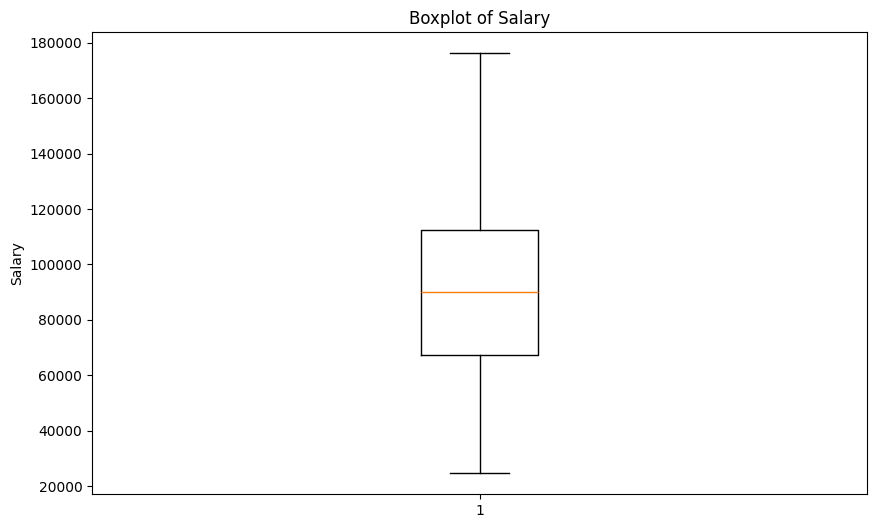

count     11000.000000
mean      89892.196046
std       31131.582496
min       30000.000000
25%       67218.000000
50%       89886.585012
75%      112242.000000
max      176156.206747
Name: Salary, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_14096\1552061129.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(median_salary, inplace=True)


In [28]:
#Check basic statistics of the Salary column
salary_stats = df['Salary'].describe()
print(salary_stats)

#Visualize salary distribution to identify outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.show()

#Define a reasonable salary range (e.g., based on industry knowledge)
#Let's assume salaries between $30,000 and $300,000 are reasonable
reasonable_min_salary = 30000
reasonable_max_salary = 300000

#Cap or remove salaries outside the reasonable range
df['Salary'] = np.where(df['Salary'] < reasonable_min_salary, reasonable_min_salary, df['Salary'])
df['Salary'] = np.where(df['Salary'] > reasonable_max_salary, reasonable_max_salary, df['Salary'])

#Handle missing values by filling them with the median salary
median_salary = df['Salary'].median()
df['Salary'].fillna(median_salary, inplace=True)

# Optional: Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

# Display the cleaned salary column statistics
cleaned_salary_stats = df['Salary'].describe()
print(cleaned_salary_stats)


In [29]:
data = pd.read_csv("cleaned_dataset.csv")
data.head()

,ID,Age,Email,Join Date,Salary,Department,valid_email,Name
0,1e407ff9-6255-489d-a0de-34135d4f74bd,25.0,xlopez@hotmail.com,Unknown,88552.0,Sales,True,Hunter Thomas
1,379f55b8-87d5-4739-a146-7400b78c24d1,90.0,Jillian Jenkins,2022-07-07,139227.0,Unknown,False,Jeremy Irwin
2,18261368-dfa1-47f0-afc6-bddf45926b07,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering,False,Jennifer Hammondquickly
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,39.0,luke56gonzalez.com,2021-11-05,139932.0,Support,False,Sydney Taylorso
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,71.0,figueroakayla@yahoo.com,Unknown,143456.0,Marketing,True,Julia Lee



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


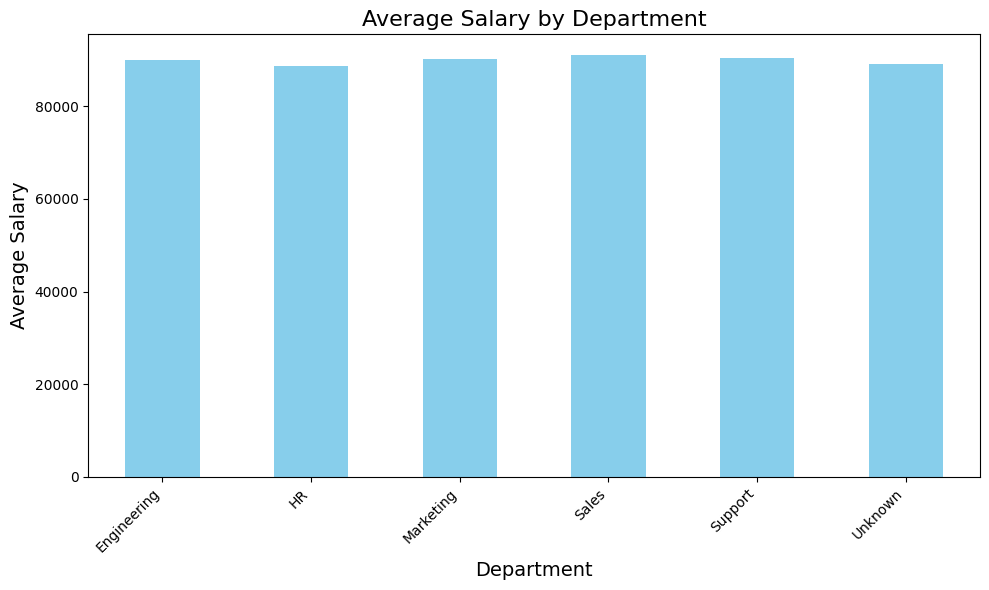

In [30]:
!pip install matplotlib
import matplotlib.pyplot as plt

#Ensure 'Salary' column is numeric (in case there are any non-numeric values)
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

#Group by 'Department' and calculate the average salary
average_salary_by_department = df.groupby('Department')['Salary'].mean()

#Plot the bar chart
plt.figure(figsize=(10, 6))
average_salary_by_department.plot(kind='bar', color='skyblue')

#Customize the plot
plt.title('Average Salary by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()


It shows salary distribution based on department 
Engineering feild members get more salary based on other department
There is small variation in salary as compared to the other department


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


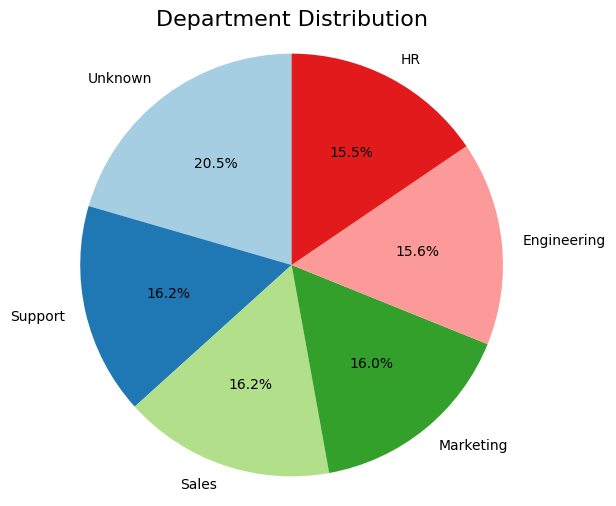

In [31]:
!pip install matplotlib
import matplotlib.pyplot as plt

#Get the frequency of each department
department_counts = data['Department'].value_counts()

#Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

#Customize the plot
plt.title('Department Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

#Show the pie chart
plt.show()

In [ ]:
In this pie chart shows the department distribution.
all department contains almost same number of members

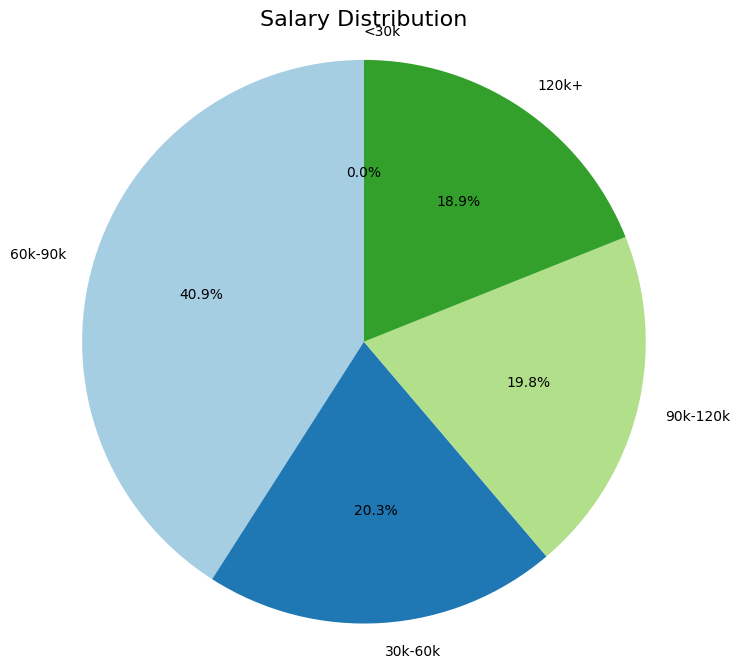

In [32]:
#Ensure 'Salary' column is numeric (in case there are any non-numeric values)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

#Define salary bins and labels
bins = [0, 30000, 60000, 90000, 120000, 150000]  # Adjust bins as necessary
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']

#Create a new column with salary categories
df['Salary Category'] = pd.cut(df['Salary'], bins=bins, labels=labels, right=False)

#Get the counts of each salary category
salary_distribution = df['Salary Category'].value_counts()

#Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(salary_distribution, labels=salary_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

#Customize the plot
plt.title('Salary Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

#Show the pie chart
plt.show()


Above pie chart shows salary distribution.
In this figure we can understand nobody have salary below 30k
Most of them have salary between 60k-90k

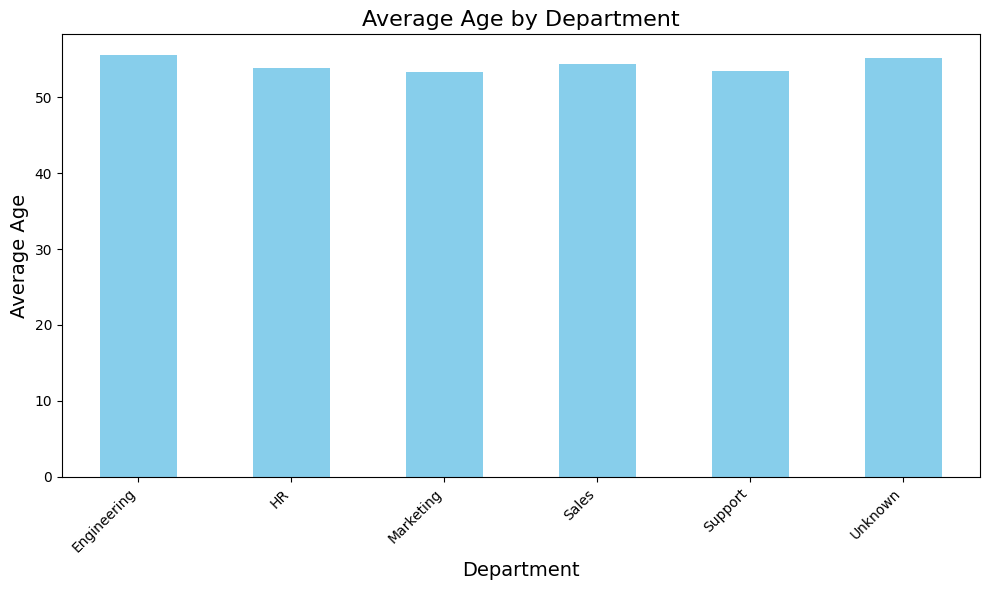

In [33]:
#Ensure 'Age' column is numeric (in case there are any non-numeric values)
data['Age'] = pd.to_numeric(df['Age'], errors='coerce')

#Group by 'Department' and calculate the average age
age_by_department = data.groupby('Department')['Age'].mean()

#Plot the bar chart
plt.figure(figsize=(10, 6))
age_by_department.plot(kind='bar', color='skyblue')

#Customize the plot
plt.title('Average Age by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()


In [ ]:
It shows department vs age distribution